# Importing Libraries

In [1]:
!pip install bert-for-tf2

     ---------------------------------------- 0.0/41.2 kB ? eta -:--:--
     ---------------------------------------  41.0/41.2 kB 2.0 MB/s eta 0:00:01
     ---------------------------------------  41.0/41.2 kB 2.0 MB/s eta 0:00:01
     ---------------------------------------  41.0/41.2 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 41.2/41.2 kB 220.8 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-py3-none-any.whl size=30557 sha256=b4f8ec935e0f5351a208b3ed885aee1e3157f215ee420adb9f0856e73763cdda
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\69\ce\32\63d802240b53e413325c5f7bc239a66d0e889d73a875ab5921
  Created 

In [3]:
!pip install tensorflow_hub

  Obtaining dependency information for tensorflow_hub from https://files.pythonhosted.org/packages/6e/1a/fbae76f4057b9bcdf9468025d7a8ca952dec14bfafb9fc0b1e4244ce212f/tensorflow_hub-0.15.0-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/85.4 kB ? eta -:--:--
   -------------------------------------- - 81.9/85.4 kB ? eta -:--:--
   ---------------------------------------- 85.4/85.4 kB 2.4 MB/s eta 0:00:00


In [6]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   ------------------------------------- -- 143.4/151.4 kB 8.9 MB/s eta 0:00:01
   ---------------------------------------- 151.4/151.4 kB 3.0 MB/s eta 0:00:00


In [7]:
import numpy as np
import math
import re
import pandas as pd
from bs4 import BeautifulSoup
import random
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import bert
import plotly.express as px
from wordcloud import WordCloud

In [5]:
!pip install sentencepiece

     ---------------------------------------- 0.0/977.5 kB ? eta -:--:--
     --------------- --------------------- 399.4/977.5 kB 12.6 MB/s eta 0:00:01
     ------------------------------------  972.8/977.5 kB 20.9 MB/s eta 0:00:01
     ------------------------------------- 977.5/977.5 kB 12.4 MB/s eta 0:00:00


# Analyzing the Data

In [9]:
data = pd.read_csv("C:/Users/admin/Downloads/stock_data.csv")
data

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,-1
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


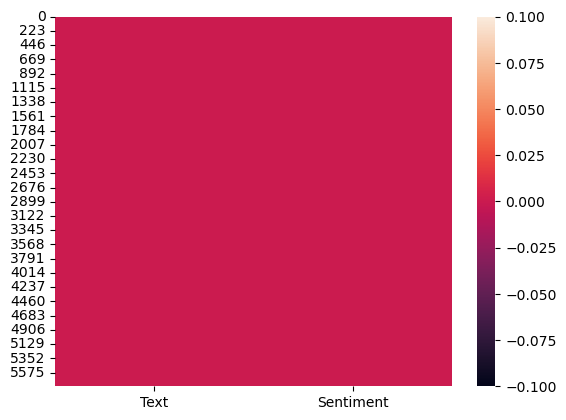

In [10]:
sns.heatmap(data.isnull());

In [12]:
temp = data.describe()
temp.style.background_gradient(cmap='Greens')

,Sentiment
count,5791.000000
mean,0.272664
std,0.962192
min,-1.000000
25%,-1.000000
50%,1.000000
75%,1.000000
max,1.000000


(0.0, 4053.5000000000005)

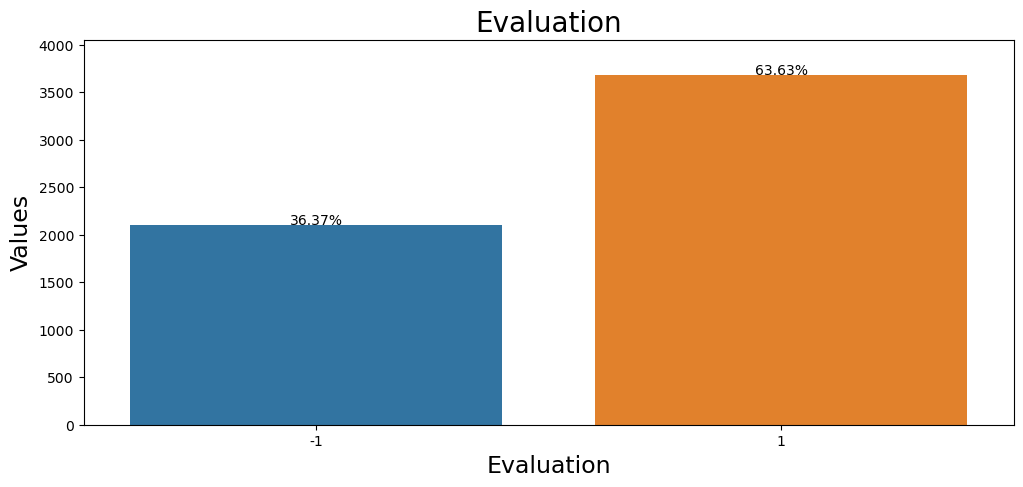

In [13]:
total = len(data)
ax1 = plt.figure(figsize=(12,5))

g = sns.countplot(x='Sentiment', data=data)
g.set_title("Evaluation", fontsize=20)
g.set_xlabel("Evaluation", fontsize=17)
g.set_ylabel("Values", fontsize=17)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=10) 
g.set_ylim(0, max(sizes) * 1.1)

In [21]:
fig2 = px.histogram(data,x='Sentiment',color='Sentiment',color_discrete_sequence=['purple', 'light blue'], template='plotly_dark')
fig2.show()

In [22]:
positive = data[data['Sentiment'] == 1 ]
negative = data[data['Sentiment'] == -1]

In [23]:
data

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,-1
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


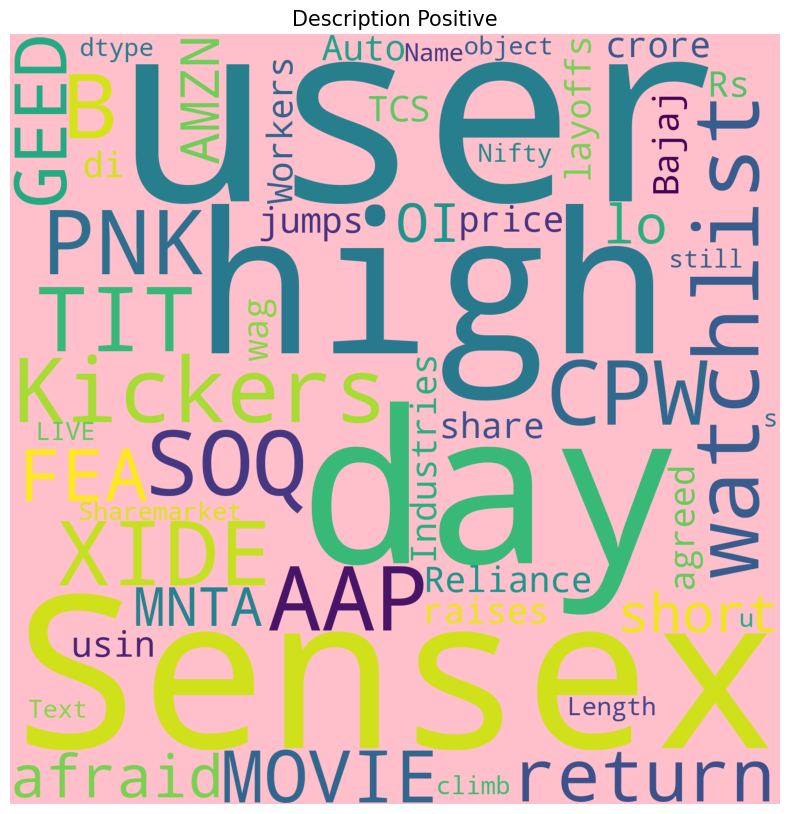

In [38]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fast')
wc = WordCloud(background_color = 'pink', width = 1500, height = 1500).generate(str(positive['Text']))
plt.title('Description Positive', fontsize = 15)
plt.imshow(wc)
plt.axis('off')
plt.show()

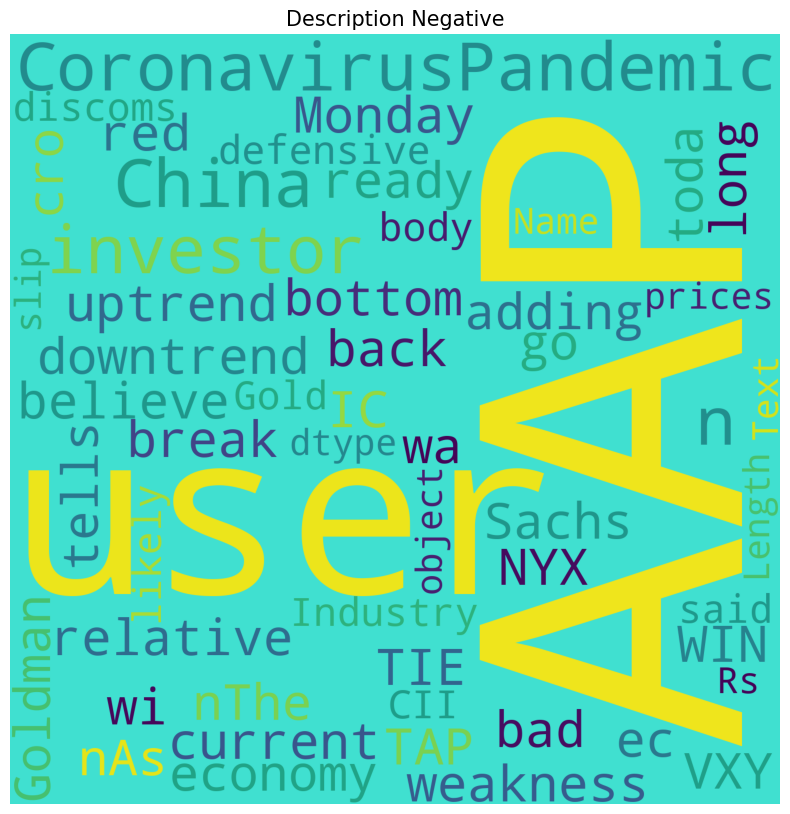

In [30]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fast')
wc = WordCloud(background_color = 'turquoise', width = 1500, height = 1500).generate(str(negative['Text']))
plt.title('Description Negative', fontsize = 15)
plt.imshow(wc)
plt.axis('off')
plt.show()

# Cleaning the Texts

In [39]:
def clean_tweet(tweet):
  tweet = BeautifulSoup(tweet, 'lxml').get_text()
  tweet = re.sub(r"@[A-Za-z0-9]+", ' ', tweet)
  tweet = re.sub(r"https?://[A-Za-z0-9./]+", ' ', tweet)
  tweet = re.sub(r"[^a-zA-Z.!?']", ' ', tweet)
  tweet = re.sub(r" +", ' ', tweet)
  return tweet

In [40]:
test = '99 ' + data.Text[0]
test

'99 Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ  trade method 1 or method 2, see prev posts'

In [41]:
result = clean_tweet(test)
result

' Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ trade method or method see prev posts'

In [42]:
data_clean = [clean_tweet(tweet) for tweet in data.Text]

C:\Users\admin\AppData\Local\Temp\ipykernel_13904\1893640057.py:2: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.



In [43]:
data_clean[0:4]

['Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ trade method or method see prev posts',
 'user AAP MOVIE. return for the FEA GEED indicator just trades for the year. AWESOME. ',
 "user I'd be afraid to short AMZN they are looking like a near monopoly in eBooks and infrastructure as a service",
 'MNTA Over . ']

In [44]:
data_labels = data.Sentiment.values
data_labels

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

# Tokenization

In [45]:
FullTokenizer = bert.bert_tokenization.FullTokenizer
bert_layer = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/1', trainable=False)  
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = FullTokenizer(vocab_file, do_lower_case)

In [46]:
vocab_file

b'C:\\Users\\admin\\AppData\\Local\\Temp\\tfhub_modules\\88ac13afec2955fd14396e4582c251841b67429a\\assets\\vocab.txt'

In [47]:
len(tokenizer.vocab)

30522

In [48]:
def encode_sentence(sent):
  return tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sent))

In [49]:
data_inputs = [encode_sentence(sentence) for sentence in data_clean]

# Database Creation

In [52]:
data_with_len = [[sent, data_labels[i], len(sent)]
                 for i, sent in enumerate(data_inputs)]

In [53]:
random.shuffle(data_with_len)
data_with_len.sort(key=lambda x: x[2])
sorted_all = [(sent_lab[0], sent_lab[1])
              for sent_lab in data_with_len if sent_lab[2] > 7]

In [54]:
all_dataset = tf.data.Dataset.from_generator(lambda: sorted_all,
                                             output_types = (tf.int32, tf.int32))

In [55]:
next(iter(all_dataset))

(<tf.Tensor: shape=(8,), dtype=int32, numpy=array([23292,  2001,  1996,  2060,  2502,  2851,  6578,  4842])>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>)

In [56]:
BATCH_SIZE = 32
all_batched = all_dataset.padded_batch(BATCH_SIZE, padded_shapes=((None, ), ()))

In [57]:
next(iter(all_batched))

(<tf.Tensor: shape=(32, 8), dtype=int32, numpy=
 array([[23292,  2001,  1996,  2060,  2502,  2851,  6578,  4842],
        [ 9779,  2361,  3201,  1012,  1012,  1012,  1039,  1012],
        [22330,  2078,  2006,  5210,  3338,  2030,  2058,  1012],
        [ 9779,  2045,  3632,  1996,  4268,  2267,  4636,   999],
        [22260,  2078,  5837,  2011,  1996,  1040,  2863,  7483],
        [25328,  3835,  7087,  4509, 17439,  2071,  3769,  2574],
        [ 1052,  2532,  3504,  2066,  1037,  5024,  2275,  2039],
        [ 1050,  2546,  2595, 21054,  9132,  1012, 10166,  1012],
        [24095,  2146,  1012,  2559,  2005, 13633,  3566,  2080],
        [12935,  2633,  2559,  2005,  1012,  2279,  1056, 13512],
        [ 2149,  6107,  4212,  1999,  2233, 13463, 21887, 23350],
        [ 1043,  2440,  2095,  7065,  2015, 20383,  5443,  1012],
        [ 1059, 16715, 10882,  5910,  2360,  2182,  2030,  1012],
        [11721,  2063,  2146,  1012,  1012,  1012,  4539,  1012],
        [ 5796,  2290,  3376

In [58]:
len(sorted_all)



5090

In [59]:
NB_BATCHES = len(sorted_all) // BATCH_SIZE
NB_BATCHES

159

In [60]:
NB_BATCHES_TEST = NB_BATCHES // 10
NB_BATCHES_TEST



15

In [61]:
all_batched.shuffle(NB_BATCHES)
test_dataset = all_batched.take(NB_BATCHES_TEST)
train_dataset = all_batched.skip(NB_BATCHES_TEST)


In [62]:
next(iter(test_dataset))

(<tf.Tensor: shape=(32, 8), dtype=int32, numpy=
 array([[23292,  2001,  1996,  2060,  2502,  2851,  6578,  4842],
        [ 9779,  2361,  3201,  1012,  1012,  1012,  1039,  1012],
        [22330,  2078,  2006,  5210,  3338,  2030,  2058,  1012],
        [ 9779,  2045,  3632,  1996,  4268,  2267,  4636,   999],
        [22260,  2078,  5837,  2011,  1996,  1040,  2863,  7483],
        [25328,  3835,  7087,  4509, 17439,  2071,  3769,  2574],
        [ 1052,  2532,  3504,  2066,  1037,  5024,  2275,  2039],
        [ 1050,  2546,  2595, 21054,  9132,  1012, 10166,  1012],
        [24095,  2146,  1012,  2559,  2005, 13633,  3566,  2080],
        [12935,  2633,  2559,  2005,  1012,  2279,  1056, 13512],
        [ 2149,  6107,  4212,  1999,  2233, 13463, 21887, 23350],
        [ 1043,  2440,  2095,  7065,  2015, 20383,  5443,  1012],
        [ 1059, 16715, 10882,  5910,  2360,  2182,  2030,  1012],
        [11721,  2063,  2146,  1012,  1012,  1012,  4539,  1012],
        [ 5796,  2290,  3376

In [63]:
next(iter(train_dataset))

(<tf.Tensor: shape=(32, 10), dtype=int32, numpy=
 array([[21887, 23350,  5325, 26062, 24950,  2634,  3930, 19939,  2000,
          1012],
        [ 9123,  4454,  2067,  2379,  2035,  2051, 26836,  1012,  1999,
          2378],
        [ 8670,  2278,  3452,  3006,  2003, 17886,  2075, 13619,  5166,
           999],
        [ 1061,  6806,  2080,  7087,  4509, 25129,  4484,  2006,  9186,
          3872],
        [ 2137,  2482,  5414,  7909,  3408,  2031,  2196,  2042,  2061,
         12382],
        [ 6578,  3561,  2051,  2005,  9779, 24759,  2000,  5256,  2039,
          1012],
        [ 8288,  7597,  2061,  2906,  6932, 26676,  1998,  6617,  2000,
         25740],
        [29175,  5358,  3733,  2298,  2012,  2197,  2086,  3296,  3318,
          2951],
        [11721,  2063,  8418, 24797, 14371, 17472,  7473, 20936,  3070,
         18216],
        [ 1040,  4859,  2078, 12447,  2039,  2471,  2175,  2051,  2182,
           999],
        [ 4937,  1051, 23212,  3070,  2005,  3335,  1012,  65

# Model building

In [65]:
class DCNN(tf.keras.Model):

  def __init__(self,
               vocab_size,
               emb_dim=128,
               nb_filters = 50,
               FFN_units=512,
               nb_classes=2,
               dropout_rate=0.1,
               training=False,
               name="dcnn"):
    super(DCNN, self).__init__(name=name)

    self.embedding = layers.Embedding(vocab_size, emb_dim)

    self.bigram = layers.Conv1D(filters = nb_filters,
                                kernel_size = 2,
                                padding='valid',
                                activation='relu')
    self.trigram = layers.Conv1D(filters = nb_filters,
                                kernel_size = 3,
                                padding='valid',
                                activation='relu')
    self.fourgram = layers.Conv1D(filters = nb_filters,
                                kernel_size = 4,
                                padding='valid',
                                activation='relu')
    
    self.pool = layers.GlobalMaxPool1D()

    self.dense_1 = layers.Dense(units = FFN_units, activation='relu')
    self.dropout = layers.Dropout(rate=dropout_rate)
    if nb_classes == 2:
      self.last_dense = layers.Dense(units=1, activation='sigmoid')
    else:
      self.last_dense = layers.Dense(units=nb_classes, activation='softmax')

  def call(self, inputs, training):
    x = self.embedding(inputs)
    x_1 = self.bigram(x)
    x_1 = self.pool(x_1)
    x_2 = self.trigram(x)
    x_2 = self.pool(x_2)
    x_3 = self.fourgram(x)
    x_3 = self.pool(x_3)

    merged = tf.concat([x_1, x_2, x_3], axis = -1)
    merged = self.dense_1(merged)
    merged = self.dropout(merged, training)
    output = self.last_dense(merged)

    return output

# Training

In [66]:

VOCAB_SIZE = len(tokenizer.vocab)
EMB_DIM = 200
NB_FILTERS = 100
FFN_UNITS = 256
NB_CLASSES = 2
DROPOUT_RATE = 0.2
NB_EPOCHS = 4

In [67]:
Dcnn = DCNN(vocab_size=VOCAB_SIZE,
            emb_dim=EMB_DIM,
            nb_filters = NB_FILTERS,
            FFN_units = FFN_UNITS,
            nb_classes = NB_CLASSES,
            dropout_rate = DROPOUT_RATE)

In [68]:
if NB_CLASSES == 2:
  Dcnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
else:
  Dcnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

In [69]:
history = Dcnn.fit(train_dataset,
                   epochs=NB_EPOCHS)  

Epoch 1/4
145/145 [==============================] - 16s 98ms/step - loss: -6.1185 - accuracy: 0.1575
Epoch 2/4
145/145 [==============================] - 14s 93ms/step - loss: -1985.3225 - accuracy: 0.3169
Epoch 3/4
145/145 [==============================] - 14s 96ms/step - loss: -32573.7168 - accuracy: 0.3403
Epoch 4/4
145/145 [==============================] - 14s 94ms/step - loss: -179460.8438 - accuracy: 0.3512


# Evaluation

In [70]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

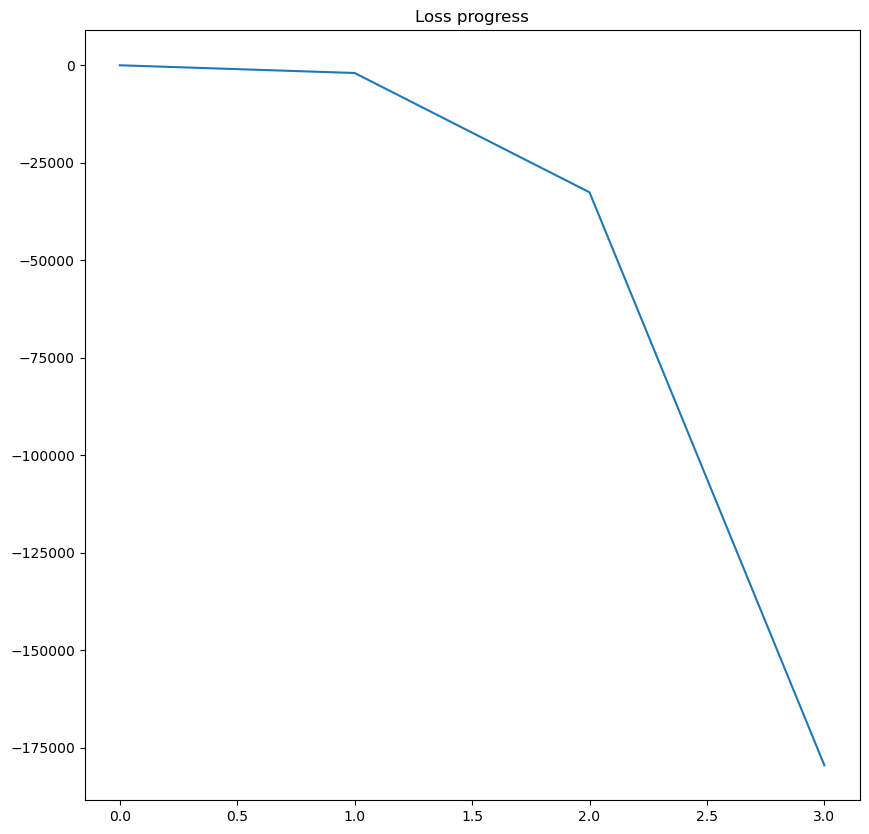

In [71]:
plt.plot(history.history['loss'])
plt.title('Loss progress');

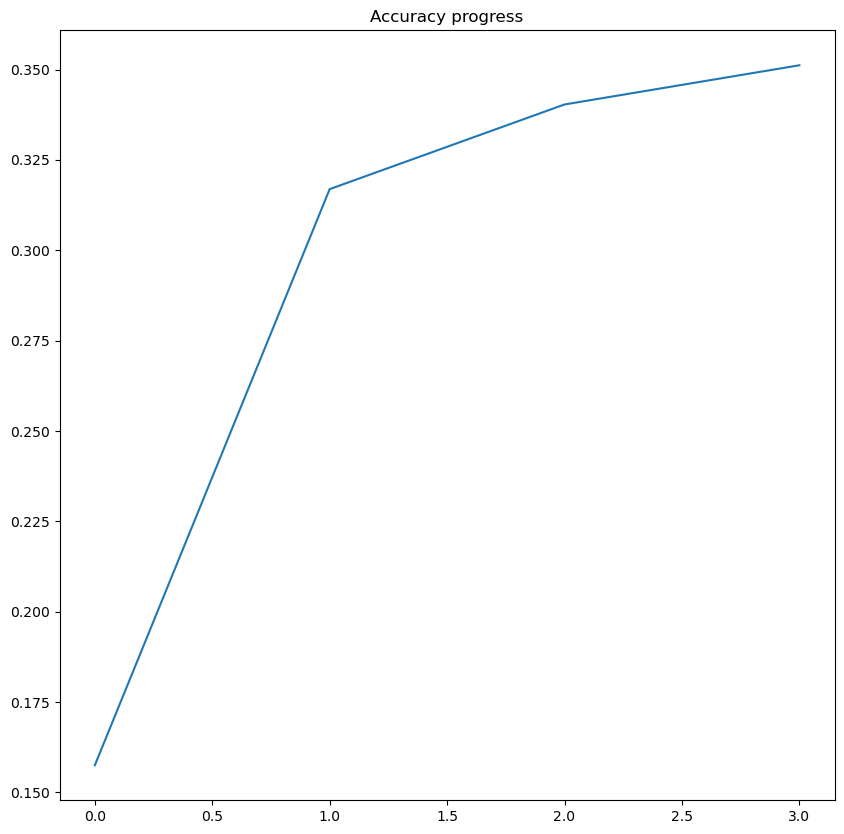

In [72]:
plt.plot(history.history['accuracy'])
plt.title('Accuracy progress');

In [73]:
results = Dcnn.evaluate(test_dataset)
print(results)

15/15 [==============================] - 0s 8ms/step - loss: -206377.4688 - accuracy: 0.4292
[-206377.46875, 0.42916667461395264]


In [74]:
def get_prediction(sentence):
  tokens = encode_sentence(sentence)
  inputs = tf.expand_dims(tokens, 0) 

  output = Dcnn(inputs, training=False)

  sentiment = math.floor(output*2)

  if sentiment == 0:
    print('negative')
  elif sentiment == 1:
    print('positive')

In [75]:
get_prediction(" not do that again")

negative


In [76]:
get_prediction('This a big problem')

negative
